In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Link: https://www.kaggle.com/datasets/delfinaoliva/movies

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/EnzoM5/arquivos_csv/refs/heads/main/movies_data.csv')

# Análise Exploratória

In [30]:
df

,Movie,Director,Running time,Actor 1,Actor 2,Actor 3,Genre,Budget,Box Office,Actors Box Office %,Director Box Office %,Earnings,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
0,13 Hours,Michael Bay,144,Toby Stephens,James Badge Dale,David Costabile,Action,50000000,69400000,50.00,69.23,19400000,0,0.0,2016,7.4
1,16 Blocks,Richard Donner,102,Bruce Willis,David Zayas,Sasha Roiz,Action,52000000,65000000,33.33,50.00,13000000,0,0.0,2006,6.6
2,17 Again,Burr Steers,102,Matthew Perry,Hunter Parrish,Thomas Lennon,Comedy,20000000,139000000,44.44,25.00,119000000,0,0.0,2009,6.4
3,1982,Tommy Oliver,90,Bokeem Woodbine,Ruby Dee,Quinton Aaron,Drama,1000000,2000000,50.00,100.00,1000000,0,0.0,2013,7.1
4,2 Fast 2 Furious,John Singleton,107,Paul Walker,Cole Hauser,Mo Gallini,Action,76000000,236000000,75.00,42.85,160000000,0,0.0,2003,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,Z Storm,David Lam,92,Michael Wong,Louis Koo,Stephen Au,Action,7000000,17000000,100.00,100.00,10000000,0,0.0,2014,5.3
3962,Zack and Miri Make a Porno,Kevin Smith,101,Gerry Bednob,Jeff Anderson,Jennifer Schwalbach Smith,Comedy,24000000,42000000,66.67,41.66,18000000,0,0.0,2008,6.6
3963,Zero Effect,Jake Kasdan,116,Kim Dickens,Ryan O'Neal,Angela Featherstone,Comedy,5000000,2000000,33.33,50.00,-3000000,0,0.0,1998,7.0
3964,Zombieland,Ruben Fleischer,88,Emma Stone,Bill Murray,Derek Graf,Adventure,23600000,102000000,66.67,33.33,78400000,0,0.0,2009,7.7


In [31]:
df.isna().sum()

Movie                                  0
Director                               0
Running time                           0
Actor 1                                0
Actor 2                                0
Actor 3                                2
Genre                                  0
Budget                                 0
Box Office                             0
Actors Box Office %                    0
Director Box Office %                  0
Earnings                               0
Oscar and Golden Globes nominations    0
Oscar and Golden Globes awards         3
Release year                           0
IMDb score                             0
dtype: int64

In [32]:
df.loc[df['Oscar and Golden Globes awards'].isna()]

,Movie,Director,Running time,Actor 1,Actor 2,Actor 3,Genre,Budget,Box Office,Actors Box Office %,Director Box Office %,Earnings,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
2179,Beyond the Sea,Kevin Spacey,118,Kevin Spacey,Bob Hoskins,Brenda Blethyn,Biography,23000000,8600000,66.67,0.00,-14400000,2,NaN,2004,6.7
2187,Billy Elliot,Stephen Daldry,110,Julie Walters,Gary Lewis,Jamie Draven,Drama,5000000,109000000,100.00,25.00,104000000,3,NaN,2000,7.7
2428,Drive,Nicolas Winding Refn,100,Ryan Gosling,Albert Brooks,Russ Tamblyn,Crime,15000000,78000000,73.80,66.67,63000000,4,NaN,2011,7.8


In [33]:
df.dtypes

Movie                                   object
Director                                object
Running time                             int64
Actor 1                                 object
Actor 2                                 object
Actor 3                                 object
Genre                                   object
Budget                                   int64
Box Office                               int64
Actors Box Office %                    float64
Director Box Office %                  float64
Earnings                                 int64
Oscar and Golden Globes nominations      int64
Oscar and Golden Globes awards         float64
Release year                             int64
IMDb score                             float64
dtype: object

In [34]:
df['Genre'].unique()

array(['Action', 'Comedy', 'Drama', 'Crime', 'Horror', 'Thriller',
       'Animation', 'Western', 'Sci-Fi', 'Adventure', 'Biography',
       'Documentary', 'Mystery', 'Romance'], dtype=object)

In [35]:
df_notas_crescentes = df.sort_values(by='IMDb score', ascending=True)
df_notas_decrescentes = df.sort_values(by='IMDb score', ascending=False )

In [36]:
print('Nota Média: ', df['IMDb score'].mean().round(2))
print('Variância das Notas:', (df_notas_decrescentes['IMDb score'].head(100).mean() - df_notas_crescentes['IMDb score'].head(100).mean()).round(2))

Nota Média:  6.47
Variância das Notas: 5.24


# Visualizando e Tratando Dados

Os valores vazios em 'Oscar and Golden Globes awards' são considerados como nunca terem vencido um dos prêmios abaixo e, por isso, 
é adequado preenche-los com zero (0):

In [37]:
df['Oscar and Golden Globes awards']=df['Oscar and Golden Globes awards'].fillna(0)

### Relação Nota-Faturamento

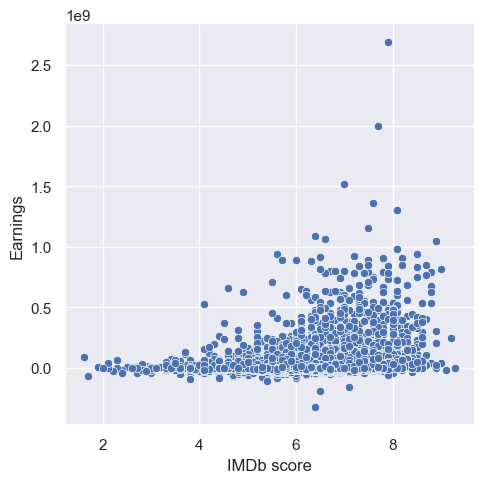

In [38]:
sns.set_theme(style='darkgrid')

sns.relplot(
    data = df,
    x = 'IMDb score',
    y = 'Earnings',
)
plt.show()

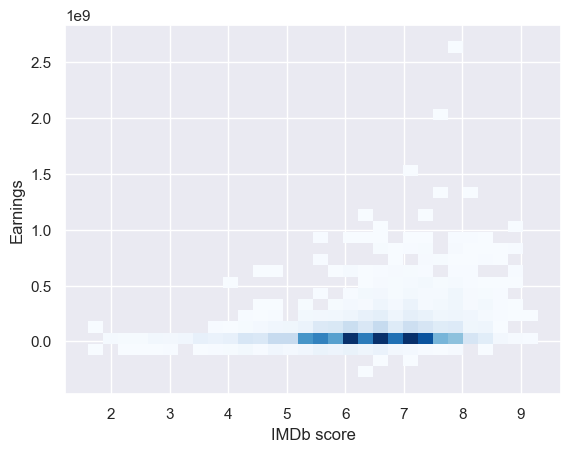

In [39]:
sns.histplot(
    data = df,
    x = 'IMDb score',
    y = 'Earnings',
    bins = 30,
    pmax = 0.8,
    cmap = 'Blues'
)
plt.show()

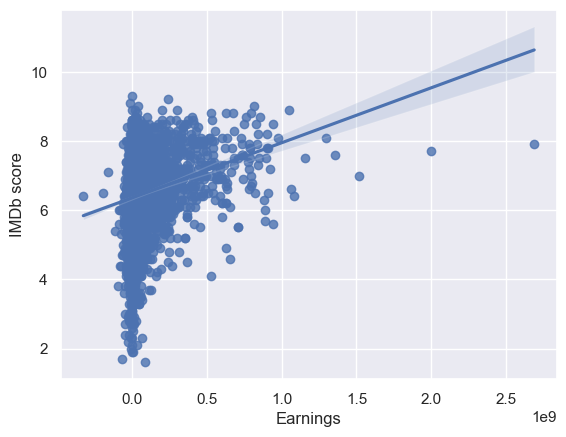

In [40]:
sns.regplot(
    data = df,
    x = 'Earnings',
    y = 'IMDb score'
)
plt.show()

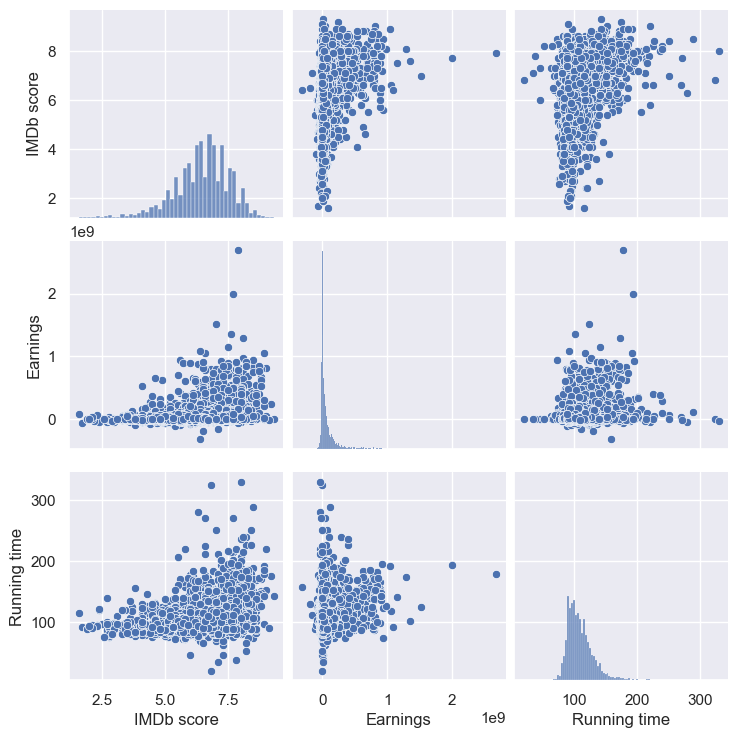

In [41]:
sns.pairplot(
    df[[
        'IMDb score',
        'Earnings',
        'Running time'
    ]]
)
plt.show()

### Descobrimos a existência de notas faturamentos negativos, devendo ser tratados.

In [42]:
df[['Earnings', 'Box Office']].loc[(df['Earnings'] < 0) & (df['Earnings'].abs() == df['Box Office'].abs())]

,Earnings,Box Office
30,-3000000,3000000
73,-30000000,30000000
713,-5000000,5000000
733,-30000000,30000000
748,-32000000,32000000
776,-30000000,30000000
1201,-22500000,22500000
1258,-10000000,10000000
1378,-16000000,16000000
1539,-18000000,18000000


In [43]:
tratamento_absoluto = (df['Earnings'] < 0) & (df['Earnings'].abs() == df['Box Office'].abs())

In [44]:
df.loc[tratamento_absoluto, 'Earnings'] = df['Earnings'].abs()

In [45]:
df[['Earnings', 'Box Office']].loc[(df['Earnings'] < 0) & (df['Earnings'].abs() == df['Box Office'].abs())]

,Earnings,Box Office


### Descobrimos a existência de Valores em que Earnings é 0, devendo ser tratados.

In [46]:
df.loc[df['Earnings'] == 0].count()

Movie                                  68
Director                               68
Running time                           68
Actor 1                                68
Actor 2                                68
Actor 3                                68
Genre                                  68
Budget                                 68
Box Office                             68
Actors Box Office %                    68
Director Box Office %                  68
Earnings                               68
Oscar and Golden Globes nominations    68
Oscar and Golden Globes awards         68
Release year                           68
IMDb score                             68
dtype: int64

#### Descobrimos que nas mesma linhas onde Earnings é 0, os valores de Custo de Produção e Bilheteria são iguais.

In [47]:
df.loc[(df['Earnings'] == 0) & (df['Budget'] == (df['Box Office']))].count()

Movie                                  68
Director                               68
Running time                           68
Actor 1                                68
Actor 2                                68
Actor 3                                68
Genre                                  68
Budget                                 68
Box Office                             68
Actors Box Office %                    68
Director Box Office %                  68
Earnings                               68
Oscar and Golden Globes nominations    68
Oscar and Golden Globes awards         68
Release year                           68
IMDb score                             68
dtype: int64

In [48]:
#Solução Simples e Não Efetiva:
df.loc[(df['Earnings'] == 0) & (df['Budget'] == df['Box Office']), 'Earnings'] = df['Budget']
#Substituir por IA dps da entrega do projeto

In [49]:
df.loc[df['Earnings'] == 0].count()

Movie                                  0
Director                               0
Running time                           0
Actor 1                                0
Actor 2                                0
Actor 3                                0
Genre                                  0
Budget                                 0
Box Office                             0
Actors Box Office %                    0
Director Box Office %                  0
Earnings                               0
Oscar and Golden Globes nominations    0
Oscar and Golden Globes awards         0
Release year                           0
IMDb score                             0
dtype: int64

In [50]:
df[['Earnings', 'Box Office', 'Budget']].loc[df['Box Office'] == df['Budget']]

,Earnings,Box Office,Budget
105,2000000,2000000,2000000
118,60000000,60000000,60000000
157,5000000,5000000,5000000
164,35000000,35000000,35000000
190,44000000,44000000,44000000
...,...,...,...
3658,500000,500000,500000
3760,68000000,68000000,68000000
3802,19000000,19000000,19000000
3870,20000000,20000000,20000000


### Relação Genero - Ano

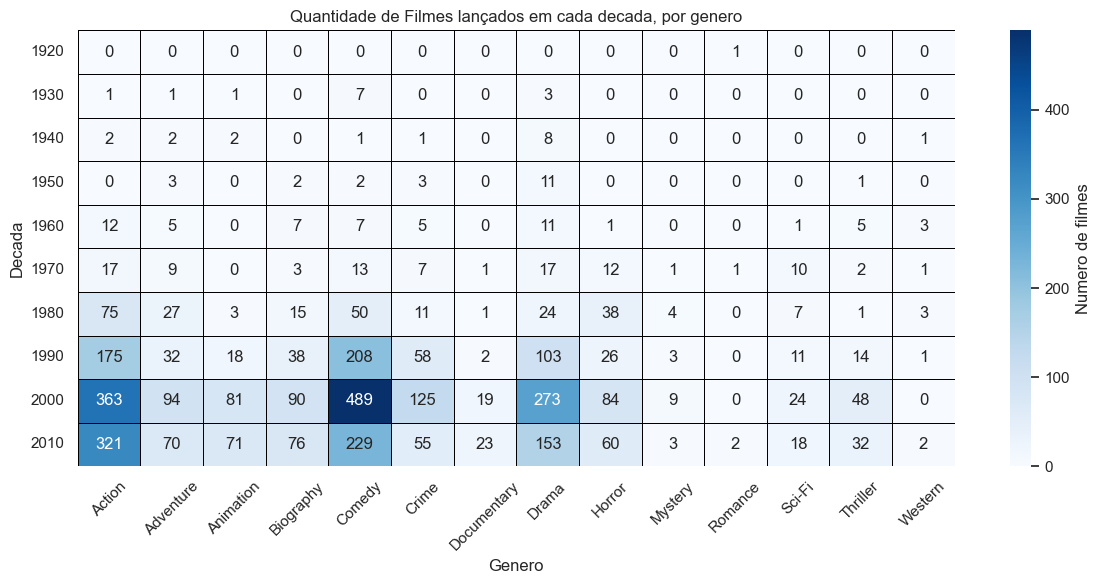

In [51]:
df['Decade'] = (df['Release year'] // 10) * 10

decade_genre_counts = df.groupby(['Decade', 'Genre']).size().unstack(fill_value=0)

styled_table = decade_genre_counts.style \
    .background_gradient(cmap='Blues') \
    .set_table_attributes('style="width: 80%; margin: auto;"') \
    .set_caption("Quantidade de Filmes lançados em cada decada, por genero") \

plt.figure(figsize=(12, 6))
sns.heatmap(decade_genre_counts, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Numero de filmes'}, linewidths=0.5, linecolor='black')
plt.title("Quantidade de Filmes lançados em cada decada, por genero")
plt.xlabel("Genero")
plt.ylabel("Decada")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [52]:
df.to_csv('df_tratado')

In [53]:
df.dtypes

Movie                                   object
Director                                object
Running time                             int64
Actor 1                                 object
Actor 2                                 object
Actor 3                                 object
Genre                                   object
Budget                                   int64
Box Office                               int64
Actors Box Office %                    float64
Director Box Office %                  float64
Earnings                                 int64
Oscar and Golden Globes nominations      int64
Oscar and Golden Globes awards         float64
Release year                             int64
IMDb score                             float64
Decade                                   int64
dtype: object